<a href="https://colab.research.google.com/github/sgulyano/mat202/blob/main/lab03extra_face_morph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT-202 Lab 3 Extra: Face Morphing using Delaunay Triangulation

In this lab, we will study an application of **Non-Parametric Transformation** for swapping or morphing faces in images (Face Morphing).
The main advantage of Non-Parametric Transformation is that it allows different parts of an image to be transformed in different ways. However, this also makes the computation more complex.

The Non-Parametric Transformation method used in this lab starts by dividing the image into corresponding regions on the objects/faces, and then applying an **Affine Transformation** to each region. For the partitioning step, we use **Delaunay Triangulation** [2], which divides the image into triangular sub-regions. Triangles are chosen because they avoid issues with self-intersecting polygons.

To specify facial regions, we will define **landmark points** manually on the two faces that are to be swapped. This is easier than manually defining corresponding areas of the face. Typically, facial landmarks include the eyes, nose, mouth, eyebrows, and face outline.
For example, in the dataset [300 Faces In-the-Wild Challenge (300-W)](https://datasets.activeloop.ai/docs/ml/datasets/300w-dataset/)
, 68 landmarks are used, as shown below:

<img src="https://miro.medium.com/v2/resize:fit:2000/format:webp/1*_L1MBDYku0pX0T7_-BVCfA.png" alt="Face Landmarks" width="650px">

In this lab, we will implement face morphing using Delaunay Triangulation, which consists of the following steps:

1. Defining Correspondences:
Partition the two face images into corresponding regions (so that each region represents the same facial part), using facial landmarks from the 300 Faces In-the-Wild Challenge (300-W)
 dataset. Then, divide the image into triangular regions with Delaunay Triangulation.

2. Morphing:
Apply an Affine Transformation to each triangular sub-region of the image until the morphed output is obtained.

<img src="https://miro.medium.com/v2/resize:fit:2000/format:webp/1*zLMvfOhkoeXRAZr6kT9jkA.png" alt="Face Morphing" width="650px">

**References**
1. https://devendrapratapyadav.github.io/FaceMorphing/
2. https://en.wikipedia.org/wiki/Delaunay_triangulation

## 0. Prepare Dataset

Download sample images along with Face Landmarks from the 300 Faces In-the-Wild Challenge (300-W) dataset (https://ibug.doc.ic.ac.uk/resources/300-W/
).
The Face Landmarks are provided in text files with the .pts extension, where each line records the X, Y coordinates of each landmark point.

In [1]:
!wget -O "face_landmarks.zip" https://drive.google.com/uc?id=1cByEEoWooh-dBdCFVseGLyUMNhx6lpNL&export=download

--2025-10-06 02:39:31--  https://drive.google.com/uc?id=1cByEEoWooh-dBdCFVseGLyUMNhx6lpNL
Resolving drive.google.com (drive.google.com)... 74.125.195.138, 74.125.195.101, 74.125.195.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1cByEEoWooh-dBdCFVseGLyUMNhx6lpNL [following]
--2025-10-06 02:39:31--  https://drive.usercontent.google.com/download?id=1cByEEoWooh-dBdCFVseGLyUMNhx6lpNL
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 192.178.163.132, 2607:f8b0:400e:c17::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|192.178.163.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1899205 (1.8M) [application/octet-stream]
Saving to: ‘face_landmarks.zip’

face_landmarks.zip  100%[===================>]   1.81M  --.-KB/s    in 0.02s   

2025-10-06 02:39:33 (108 

In [2]:
!unzip -o face_landmarks.zip

Archive:  face_landmarks.zip
  inflating: indoor_025.png          
  inflating: indoor_025.pts          
  inflating: indoor_027.png          
  inflating: indoor_027.pts          


In [3]:
import re
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
%matplotlib inline

## 1. Defining Correspondences

Read the images and load the positions of the facial landmark points for both images.

In [4]:
img1 = cv2.imread("indoor_025.png", cv2.IMREAD_COLOR)
img2 = cv2.imread("indoor_027.png", cv2.IMREAD_COLOR)

In [5]:
def read_pts(fn):
    with open(fn, 'r') as f:
        coord = []
        for s in f.readlines():
            r = re.search("(?P<x>[0-9]*[.,][0-9]*) (?P<y>[0-9]*[.,][0-9]*)", s)
            if r:
                coord.append([float(r.group('x')), float(r.group('y'))])
    return np.array(coord)

coord1 = read_pts('indoor_025.pts')
coord2 = read_pts('indoor_027.pts')

Divide the image into triangular regions using Delaunay Triangulation, by calling the [`Delaunay`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.Delaunay.html) function in `SciPy`.

This method specifies the triangles using the indices of the landmark points. Therefore, we only need to compute it once and then apply the same triangle configuration to both images.

The triangles generated by Delaunay Triangulation do not overlap but instead fit together seamlessly (sharing edges) and cover the convex hull of all the landmark points.

![](https://ars.els-cdn.com/content/image/3-s2.0-B9781785482434500050-f05-07-9781785482434.jpg)

In [6]:
tri = Delaunay(coord1)

Display both images along with their facial landmark points and the regions divided using Delaunay Triangulation. Use the [`triplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.triplot.html) function to visualize the triangulated regions on the images.

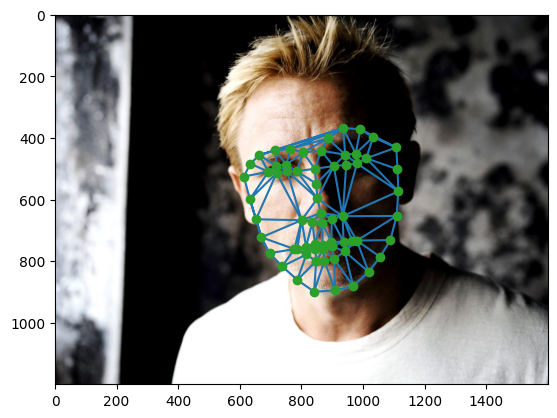

In [7]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)/255)
plt.triplot(coord1[:,0], coord1[:,1], tri.simplices)
plt.plot(coord1[:,0], coord1[:,1], 'o')
plt.show()

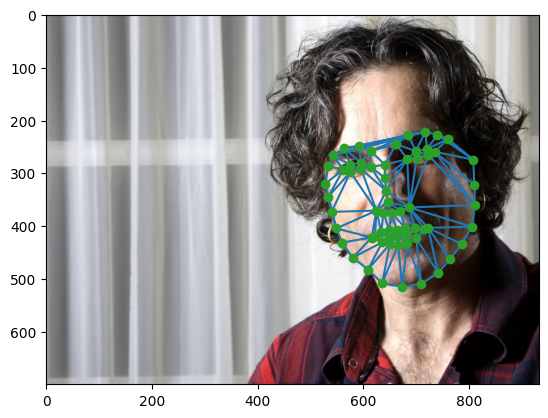

In [8]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)/255)
plt.triplot(coord2[:,0], coord2[:,1], tri.simplices)
plt.plot(coord2[:,0], coord2[:,1], 'o')
plt.show()

## 2. Morphing

Perform Affine Transformation on each triangular region of the image with the following steps:

1. Find the bounding box (a rectangle aligned with the X and Y axes) of each triangle using the `boundingRect` function. Since image data is stored as a grid, updates must be specified by row and column, and the transformation functions only support rectangular regions.
2. Create a mask (a binary image) to mark the area of the triangle using the `fillConvexPoly` function.
3. Apply Affine Transformation on the triangular region. First, compute the transformation matrix with `getAffineTransform`, then apply the transformation using warpAffine.
4. Update only the region inside the mask in the image.

In [9]:
def apply_affine_transform(src, src_tri, target_tri, size):
    warp_mat = cv2.getAffineTransform(np.float32(src_tri), np.float32(target_tri))
    dst = cv2.warpAffine(src, warp_mat, (size[0], size[1]), None, flags=cv2.INTER_LINEAR,
                         borderMode=cv2.BORDER_REFLECT_101)
    return dst

In [10]:
face = np.zeros(img2.shape, dtype=np.float32)
img = img2.copy()
i = 0
# morph each triangle
for t in tri.simplices:
    t1 = coord1[t]
    t2 = coord2[t]

    # find bounding box
    r1 = cv2.boundingRect(np.float32([t1]))
    r2 = cv2.boundingRect(np.float32([t2]))

    t1_rect = []
    t2_rect = []

    for i in range(0, 3):
        t1_rect.append(((t1[i][0] - r1[0]), (t1[i][1] - r1[1])))
        t2_rect.append(((t2[i][0] - r2[0]), (t2[i][1] - r2[1])))

    # find mask of triangle
    mask = np.zeros((r2[3], r2[2], 3), dtype=np.float32)
    cv2.fillConvexPoly(mask, np.int32(t2_rect), (1.0, 1.0, 1.0), 16, 0)

    img1_rect = img1[r1[1]:r1[1] + r1[3], r1[0]:r1[0] + r1[2]]
    img2_rect = img2[r2[1]:r2[1] + r2[3], r2[0]:r2[0] + r2[2]]

    # apply affine transformation
    size = (r2[2], r2[3])
    warp_image1 = apply_affine_transform(img1_rect, t1_rect, t2_rect, size)

    # update image over mask's area
    face[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] += warp_image1 * mask
    img[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] = img[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] * (1 - mask) + warp_image1 * mask

Display the morphed face image.

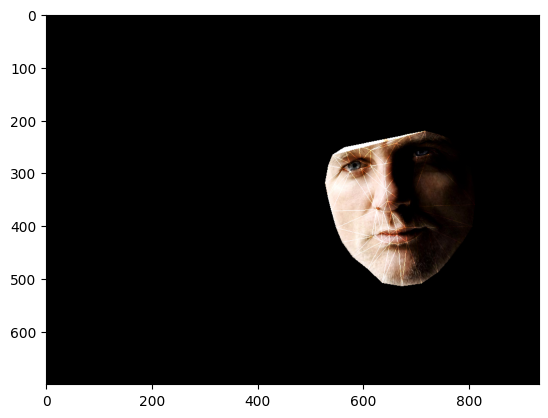

In [11]:
plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB)/255)

Compare the two original images with the resulting image after performing Face Morphing.
It can be observed that the facial features have been swapped between the two faces.

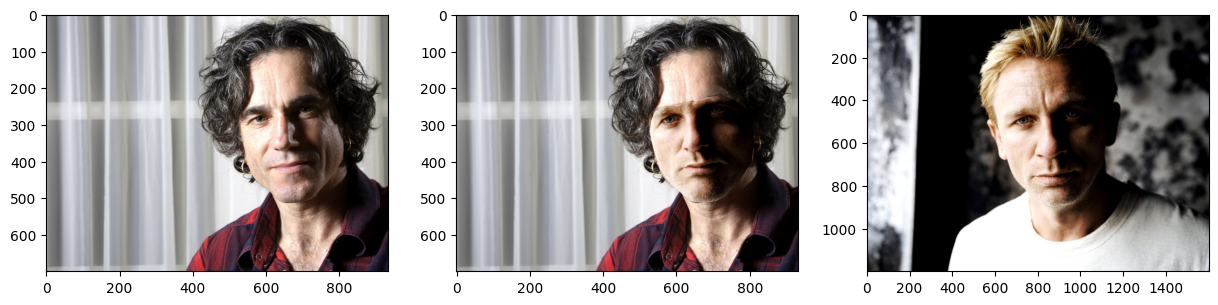

In [12]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)/255)
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255)
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)/255)

----